In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from fbprophet import Prophet

import datetime

In [62]:
data = pd.read_csv("data/rentals_2010_2020.csv")

In [63]:
print(data.shape)
data.head()

(106, 86)


,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
0,102001,United States,0,1368.0,1376,1379,1395,1408,1419,1428,1433,1433,1432,1431,1432,1437,1445,1455,1468,1478,1487,1493,1497,1499,1498,1500,1499,1505,1513,1523,1534,1543,1552,1553,1556,1556,1555,1554,1554,1558,1564,1572,1583,1592,1599,1605,1605,1597,1597,1599,1600,1605,1613,1623,1633,1644,1654,1659,1661,1661,1660,1662,1662,1665,1674,1684,1695,1706,1716,1721,1723,1720,1717,1715,1720,1730,1740,1748,1745,1743,1744,1745,1737,1734,1729,1734
1,394913,"New York, NY",1,2329.0,2351,2355,2385,2414,2434,2447,2455,2456,2455,2455,2452,2459,2471,2491,2520,2533,2550,2560,2563,2570,2570,2562,2558,2562,2565,2574,2601,2614,2625,2609,2622,2623,2620,2617,2604,2610,2612,2620,2639,2654,2663,2671,2665,2680,2660,2644,2637,2630,2640,2652,2671,2686,2701,2710,2712,2711,2700,2692,2686,2692,2703,2719,2726,2754,2777,2785,2788,2778,2779,2757,2748,2756,2785,2804,2788,2772,2752,2717,2654,2600,2543,2528
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,1866.0,1886,1891,1916,1939,1962,1985,1996,2003,2010,2016,2020,2033,2039,2056,2073,2086,2097,2115,2129,2143,2146,2159,2163,2176,2186,2200,2218,2239,2249,2254,2270,2278,2286,2284,2291,2297,2311,2321,2340,2354,2363,2376,2385,2388,2391,2390,2391,2403,2415,2422,2436,2444,2463,2470,2481,2488,2498,2505,2505,2506,2515,2522,2534,2540,2554,2564,2573,2575,2570,2571,2584,2600,2608,2609,2587,2569,2573,2574,2570,2568,2568,2579
3,394463,"Chicago, IL",3,1448.0,1461,1464,1482,1498,1510,1519,1521,1517,1508,1506,1504,1509,1515,1505,1516,1538,1555,1563,1570,1566,1556,1549,1549,1556,1566,1577,1591,1605,1615,1620,1620,1610,1599,1590,1586,1585,1597,1611,1624,1638,1646,1651,1645,1637,1623,1613,1614,1619,1629,1640,1651,1665,1676,1680,1678,1668,1656,1649,1648,1655,1664,1679,1694,1708,1716,1721,1724,1714,1706,1698,1694,1705,1714,1725,1723,1722,1723,1720,1709,1690,1674,1661
4,394514,"Dallas-Fort Worth, TX",4,1202.0,1202,1207,1219,1232,1244,1251,1257,1257,1252,1254,1261,1261,1268,1282,1294,1303,1313,1318,1323,1322,1320,1324,1319,1323,1334,1345,1357,1369,1382,1387,1390,1389,1391,1391,1391,1392,1398,1409,1415,1426,1436,1442,1442,1440,1439,1438,1439,1442,1449,1455,1462,1469,1481,1485,1483,1482,1484,1492,1487,1490,1497,1504,1515,1525,1535,1539,1540,1535,1538,1534,1535,1542,1551,1556,1550,1544,1549,1556,1555,1556,1560,1570


In [64]:
len(data["SizeRank"].unique())

106

In [65]:
df = data.drop(columns=["RegionID", "SizeRank"])

In [66]:
df.head()

,RegionName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
0,United States,1368.0,1376,1379,1395,1408,1419,1428,1433,1433,1432,1431,1432,1437,1445,1455,1468,1478,1487,1493,1497,1499,1498,1500,1499,1505,1513,1523,1534,1543,1552,1553,1556,1556,1555,1554,1554,1558,1564,1572,1583,1592,1599,1605,1605,1597,1597,1599,1600,1605,1613,1623,1633,1644,1654,1659,1661,1661,1660,1662,1662,1665,1674,1684,1695,1706,1716,1721,1723,1720,1717,1715,1720,1730,1740,1748,1745,1743,1744,1745,1737,1734,1729,1734
1,"New York, NY",2329.0,2351,2355,2385,2414,2434,2447,2455,2456,2455,2455,2452,2459,2471,2491,2520,2533,2550,2560,2563,2570,2570,2562,2558,2562,2565,2574,2601,2614,2625,2609,2622,2623,2620,2617,2604,2610,2612,2620,2639,2654,2663,2671,2665,2680,2660,2644,2637,2630,2640,2652,2671,2686,2701,2710,2712,2711,2700,2692,2686,2692,2703,2719,2726,2754,2777,2785,2788,2778,2779,2757,2748,2756,2785,2804,2788,2772,2752,2717,2654,2600,2543,2528
2,"Los Angeles-Long Beach-Anaheim, CA",1866.0,1886,1891,1916,1939,1962,1985,1996,2003,2010,2016,2020,2033,2039,2056,2073,2086,2097,2115,2129,2143,2146,2159,2163,2176,2186,2200,2218,2239,2249,2254,2270,2278,2286,2284,2291,2297,2311,2321,2340,2354,2363,2376,2385,2388,2391,2390,2391,2403,2415,2422,2436,2444,2463,2470,2481,2488,2498,2505,2505,2506,2515,2522,2534,2540,2554,2564,2573,2575,2570,2571,2584,2600,2608,2609,2587,2569,2573,2574,2570,2568,2568,2579
3,"Chicago, IL",1448.0,1461,1464,1482,1498,1510,1519,1521,1517,1508,1506,1504,1509,1515,1505,1516,1538,1555,1563,1570,1566,1556,1549,1549,1556,1566,1577,1591,1605,1615,1620,1620,1610,1599,1590,1586,1585,1597,1611,1624,1638,1646,1651,1645,1637,1623,1613,1614,1619,1629,1640,1651,1665,1676,1680,1678,1668,1656,1649,1648,1655,1664,1679,1694,1708,1716,1721,1724,1714,1706,1698,1694,1705,1714,1725,1723,1722,1723,1720,1709,1690,1674,1661
4,"Dallas-Fort Worth, TX",1202.0,1202,1207,1219,1232,1244,1251,1257,1257,1252,1254,1261,1261,1268,1282,1294,1303,1313,1318,1323,1322,1320,1324,1319,1323,1334,1345,1357,1369,1382,1387,1390,1389,1391,1391,1391,1392,1398,1409,1415,1426,1436,1442,1442,1440,1439,1438,1439,1442,1449,1455,1462,1469,1481,1485,1483,1482,1484,1492,1487,1490,1497,1504,1515,1525,1535,1539,1540,1535,1538,1534,1535,1542,1551,1556,1550,1544,1549,1556,1555,1556,1560,1570


In [67]:
df.dtypes

RegionName     object
2014-01       float64
2014-02         int64
2014-03         int64
2014-04         int64
2014-05         int64
2014-06         int64
2014-07         int64
2014-08         int64
2014-09         int64
2014-10         int64
2014-11         int64
2014-12         int64
2015-01         int64
2015-02         int64
2015-03         int64
2015-04         int64
2015-05         int64
2015-06         int64
2015-07         int64
2015-08         int64
2015-09         int64
2015-10         int64
2015-11         int64
2015-12         int64
2016-01         int64
2016-02         int64
2016-03         int64
2016-04         int64
2016-05         int64
2016-06         int64
2016-07         int64
2016-08         int64
2016-09         int64
2016-10         int64
2016-11         int64
2016-12         int64
2017-01         int64
2017-02         int64
2017-03         int64
2017-04         int64
2017-05         int64
2017-06         int64
2017-07         int64
2017-08         int64
2017-09   

In [68]:
df.isnull().sum()

RegionName    0
2014-01       7
2014-02       0
2014-03       0
2014-04       0
2014-05       0
2014-06       0
2014-07       0
2014-08       0
2014-09       0
2014-10       0
2014-11       0
2014-12       0
2015-01       0
2015-02       0
2015-03       0
2015-04       0
2015-05       0
2015-06       0
2015-07       0
2015-08       0
2015-09       0
2015-10       0
2015-11       0
2015-12       0
2016-01       0
2016-02       0
2016-03       0
2016-04       0
2016-05       0
2016-06       0
2016-07       0
2016-08       0
2016-09       0
2016-10       0
2016-11       0
2016-12       0
2017-01       0
2017-02       0
2017-03       0
2017-04       0
2017-05       0
2017-06       0
2017-07       0
2017-08       0
2017-09       0
2017-10       0
2017-11       0
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
2018-05       0
2018-06       0
2018-07       0
2018-08       0
2018-09       0
2018-10       0
2018-11       0
2018-12       0
2019-01       0
2019-02 

In [69]:
features_with_nan = [features for features in df.columns if df[features].isnull().sum() >= 1]
features_with_nan

['2014-01']

In [70]:
def replace_nan_values(df, features_nan):
    data = df.copy()
    for feature in features_nan:
        data[feature] = data[feature].fillna(data[feature].median())
    return data

In [71]:
df2 = replace_nan_values(df, features_with_nan)

In [72]:
df2.head()

,RegionName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
0,United States,1368.0,1376,1379,1395,1408,1419,1428,1433,1433,1432,1431,1432,1437,1445,1455,1468,1478,1487,1493,1497,1499,1498,1500,1499,1505,1513,1523,1534,1543,1552,1553,1556,1556,1555,1554,1554,1558,1564,1572,1583,1592,1599,1605,1605,1597,1597,1599,1600,1605,1613,1623,1633,1644,1654,1659,1661,1661,1660,1662,1662,1665,1674,1684,1695,1706,1716,1721,1723,1720,1717,1715,1720,1730,1740,1748,1745,1743,1744,1745,1737,1734,1729,1734
1,"New York, NY",2329.0,2351,2355,2385,2414,2434,2447,2455,2456,2455,2455,2452,2459,2471,2491,2520,2533,2550,2560,2563,2570,2570,2562,2558,2562,2565,2574,2601,2614,2625,2609,2622,2623,2620,2617,2604,2610,2612,2620,2639,2654,2663,2671,2665,2680,2660,2644,2637,2630,2640,2652,2671,2686,2701,2710,2712,2711,2700,2692,2686,2692,2703,2719,2726,2754,2777,2785,2788,2778,2779,2757,2748,2756,2785,2804,2788,2772,2752,2717,2654,2600,2543,2528
2,"Los Angeles-Long Beach-Anaheim, CA",1866.0,1886,1891,1916,1939,1962,1985,1996,2003,2010,2016,2020,2033,2039,2056,2073,2086,2097,2115,2129,2143,2146,2159,2163,2176,2186,2200,2218,2239,2249,2254,2270,2278,2286,2284,2291,2297,2311,2321,2340,2354,2363,2376,2385,2388,2391,2390,2391,2403,2415,2422,2436,2444,2463,2470,2481,2488,2498,2505,2505,2506,2515,2522,2534,2540,2554,2564,2573,2575,2570,2571,2584,2600,2608,2609,2587,2569,2573,2574,2570,2568,2568,2579
3,"Chicago, IL",1448.0,1461,1464,1482,1498,1510,1519,1521,1517,1508,1506,1504,1509,1515,1505,1516,1538,1555,1563,1570,1566,1556,1549,1549,1556,1566,1577,1591,1605,1615,1620,1620,1610,1599,1590,1586,1585,1597,1611,1624,1638,1646,1651,1645,1637,1623,1613,1614,1619,1629,1640,1651,1665,1676,1680,1678,1668,1656,1649,1648,1655,1664,1679,1694,1708,1716,1721,1724,1714,1706,1698,1694,1705,1714,1725,1723,1722,1723,1720,1709,1690,1674,1661
4,"Dallas-Fort Worth, TX",1202.0,1202,1207,1219,1232,1244,1251,1257,1257,1252,1254,1261,1261,1268,1282,1294,1303,1313,1318,1323,1322,1320,1324,1319,1323,1334,1345,1357,1369,1382,1387,1390,1389,1391,1391,1391,1392,1398,1409,1415,1426,1436,1442,1442,1440,1439,1438,1439,1442,1449,1455,1462,1469,1481,1485,1483,1482,1484,1492,1487,1490,1497,1504,1515,1525,1535,1539,1540,1535,1538,1534,1535,1542,1551,1556,1550,1544,1549,1556,1555,1556,1560,1570


In [73]:
melt = df2.melt(id_vars='RegionName', var_name='date', value_name='price')

In [74]:
melt = melt.sort_values(['date', 'RegionName']).reset_index()
melt.drop(columns=["index"], inplace=True)
melt.head()

,RegionName,date,price
0,"Akron, OH",2014-01,744.0
1,"Albany, NY",2014-01,1110.0
2,"Albuquerque, NM",2014-01,977.0
3,"Allentown, PA",2014-01,1063.0
4,"Atlanta, GA",2014-01,1123.0


In [75]:
melt.shape

(8798, 3)

In [76]:
melt.tail()

,RegionName,date,price
8793,"Washington, DC",2020-11,2039.0
8794,"Wichita, KS",2020-11,850.0
8795,"Winston-Salem, NC",2020-11,1277.0
8796,"Worcester, MA",2020-11,1471.0
8797,"Youngstown, OH",2020-11,747.0


In [77]:
df2 = melt["RegionName"].apply(lambda x: x.split(", "))
city = df2.apply(lambda x: x[0])
state = df2.apply(lambda x: x[-1])
result = pd.DataFrame(zip(city, state), columns=["city", "state"])
result

,city,state
0,Akron,OH
1,Albany,NY
2,Albuquerque,NM
3,Allentown,PA
4,Atlanta,GA
...,...,...
8793,Washington,DC
8794,Wichita,KS
8795,Winston-Salem,NC
8796,Worcester,MA


In [78]:
conc_data = pd.concat([melt, result], axis=1, join="inner")
conc_data.drop(columns=["RegionName"], inplace=True)

In [79]:
conc_data.head()

,date,price,city,state
0,2014-01,744.0,Akron,OH
1,2014-01,1110.0,Albany,NY
2,2014-01,977.0,Albuquerque,NM
3,2014-01,1063.0,Allentown,PA
4,2014-01,1123.0,Atlanta,GA


In [80]:
len(conc_data.state.unique())

41

In [81]:
conc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8798 entries, 0 to 8797
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8798 non-null   object 
 1   price   8798 non-null   float64
 2   city    8798 non-null   object 
 3   state   8798 non-null   object 
dtypes: float64(1), object(3)
memory usage: 275.1+ KB


In [82]:
conc_data["date"] = pd.to_datetime(conc_data["date"], infer_datetime_format=True)

In [83]:
conc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8798 entries, 0 to 8797
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8798 non-null   datetime64[ns]
 1   price   8798 non-null   float64       
 2   city    8798 non-null   object        
 3   state   8798 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 275.1+ KB


In [84]:
print("Features: \n", conc_data.columns.to_list())
print("\n Unique values: \n", conc_data.nunique())
print("\n Null values: \n", conc_data.isnull().sum())

Features: 
 ['date', 'price', 'city', 'state']

 Unique values: 
 date       83
price    1745
city      106
state      41
dtype: int64

 Null values: 
 date     0
price    0
city     0
state    0
dtype: int64


In [85]:
conc_data["city"].value_counts()

Urban Honolulu                    83
Madison                           83
Indianapolis                      83
Buffalo                           83
Columbus                          83
Melbourne                         83
Des Moines                        83
Milwaukee                         83
Virginia Beach                    83
Jackson                           83
Akron                             83
Dayton                            83
Tulsa                             83
Augusta                           83
Chattanooga                       83
Charlotte                         83
San Jose                          83
Baltimore                         83
Phoenix                           83
Provo                             83
Grand Rapids                      83
St. Louis                         83
Louisville-Jefferson County       83
Portland                          83
Colorado Springs                  83
San Diego                         83
Chicago                           83
D

In [86]:
cities = {
    "Los Angeles-Long Beach-Anaheim": ["Los Angeles", "Long Beach", "Anaheim"],
    "North Port-Sarasota-Bradenton": ["North Port", "Sarasota", "Bradenton"],
    "Minneapolis-St Paul": ["Minneapolis", "St. Paul"],
    "Miami-Fort Lauderdale": ["Miami", "Fort Lauderdale"],
    "Louisville-Jefferson County": ["Louisville", "Jefferson County"],
    "Dallas-Fort Worth": ["Dallas", "Fort Worth"],
    "Urban Honolulu": "Honolulu",
    "Winston-Salem": ["Winston", "Salem"]
}

conc_data['city'] = conc_data['city'].map(cities).fillna(conc_data['city'])

In [285]:
modified = conc_data.explode("city")

In [286]:
modified['city'].value_counts()

Durham              83
Honolulu            83
Chicago             83
Madison             83
San Diego           83
Indianapolis        83
Buffalo             83
Los Angeles         83
Columbus            83
Melbourne           83
Des Moines          83
Milwaukee           83
Virginia Beach      83
Jackson             83
Akron               83
Dayton              83
Tulsa               83
Fort Lauderdale     83
Augusta             83
Chattanooga         83
Charlotte           83
San Jose            83
Baltimore           83
Phoenix             83
Provo               83
Grand Rapids        83
St. Louis           83
Philadelphia        83
Spokane             83
Portland            83
Fort Collins        83
Minneapolis         83
Sacramento          83
Allentown           83
Salem               83
El Paso             83
Riverside           83
North Port          83
Cincinnati          83
Boston              83
Richmond            83
Toledo              83
Kansas City         83
New Orleans

In [287]:
len(modified['city'].unique())

115

In [288]:
len(modified)

9545

In [289]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

modified['state'] = modified['state'].map(states).fillna(modified['state'])

In [290]:
modified['state'].value_counts()

Florida                 1079
California               996
Ohio                     581
Texas                    498
North Carolina           498
Colorado                 415
New York                 415
Pennsylvania             415
Tennessee                332
Utah                     249
Connecticut              249
Massachusetts            249
South Carolina           249
Georgia                  249
Oklahoma                 166
Minnesota                166
Kentucky                 166
Virginia                 166
Missouri                 166
Michigan                 166
Arizona                  166
Louisiana                166
Washington               166
Wisconsin                166
Maryland                  83
Arkansas                  83
Kansas                    83
United States             83
New Mexico                83
Illinois                  83
Iowa                      83
Rhode Island              83
Nebraska                  83
Oregon                    83
Alabama       

In [291]:
modified = modified.sort_values(by=['date', 'city'])
modified = modified.reset_index()
modified.drop(columns=["index"], inplace=True)
modified

,date,price,city,state
0,2014-01-01,744.0,Akron,Ohio
1,2014-01-01,1110.0,Albany,New York
2,2014-01-01,977.0,Albuquerque,New Mexico
3,2014-01-01,1063.0,Allentown,Pennsylvania
4,2014-01-01,1866.0,Anaheim,California
...,...,...,...,...
9540,2020-11-01,2039.0,Washington,District of Columbia
9541,2020-11-01,850.0,Wichita,Kansas
9542,2020-11-01,1277.0,Winston,North Carolina
9543,2020-11-01,1471.0,Worcester,Massachusetts


In [292]:
modified.to_csv("data/historical_rentals.csv")

In [94]:
# df_base = conc_data.sort_values(by=["City", "MonthYear"])
df_base = modified.copy()

In [275]:
df_base.shape

(9545, 4)

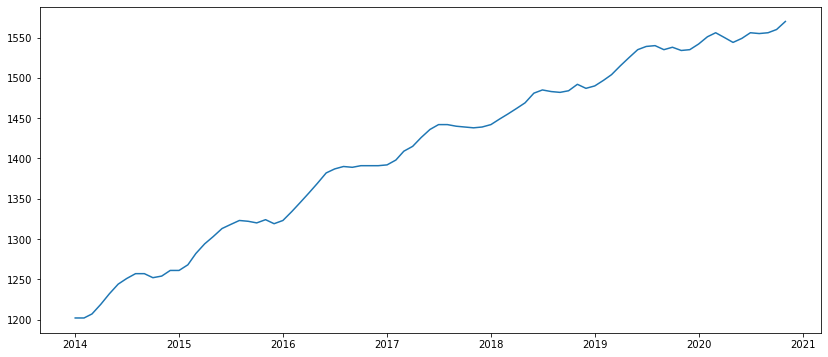

In [96]:
plt.figure(figsize=(14,6))
plt.plot(df_base.set_index("date").query('city == "Dallas"')[["price"]])
plt.show()

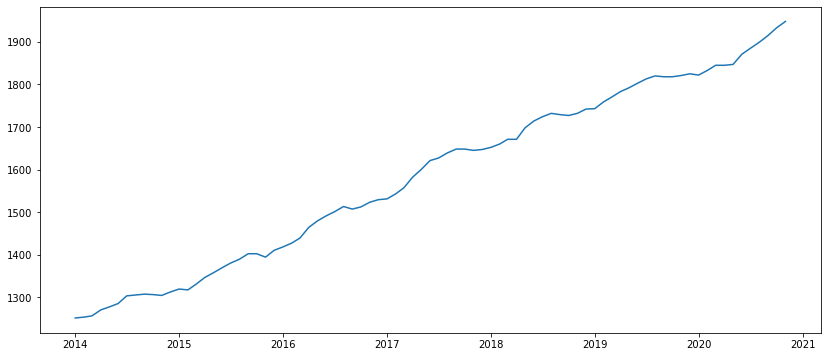

In [97]:
plt.figure(figsize=(14,6))
plt.plot(df_base.set_index("date").query('city == "Sacramento"')[["price"]])
plt.show()

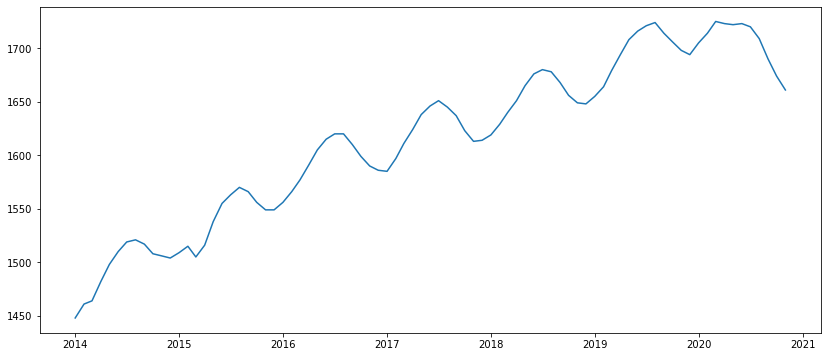

In [98]:
plt.figure(figsize=(14,6))
plt.plot(df_base.set_index("date").query('city == "Chicago"')[["price"]])
plt.show()

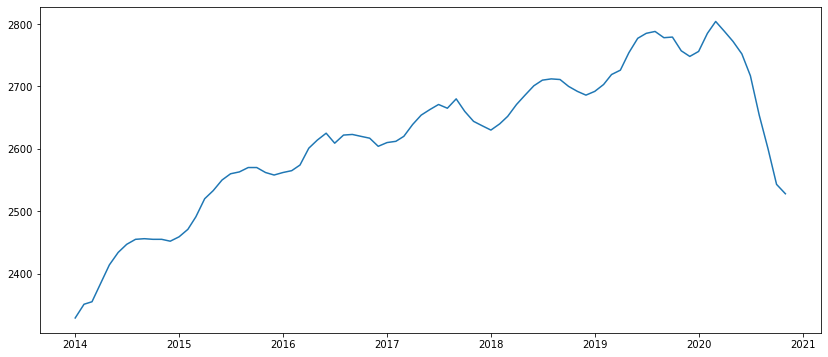

In [99]:
plt.figure(figsize=(14,6))
plt.plot(df_base.set_index("date").query('city == "New York"')[["price"]])
plt.show()

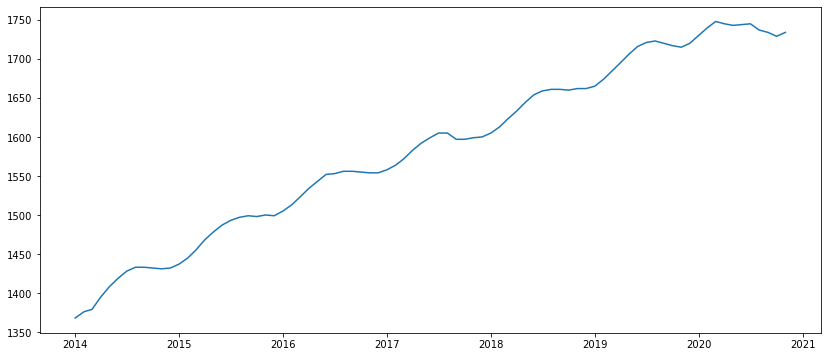

In [100]:
plt.figure(figsize=(14,6))
plt.plot(df_base.set_index("date").query('city == "United States"')[["price"]])
plt.show()

In [101]:
len(df_base['city'].unique())

115

In [102]:
df_final = df_base[["date", "price", "state", "city"]].rename({"date": "ds", "price": "y", "state": "state", "city": "city"}, axis="columns")

In [103]:
df_final.head()

,ds,y,state,city
0,2014-01-01,744.0,Ohio,Akron
1,2014-01-01,1110.0,New York,Albany
2,2014-01-01,977.0,New Mexico,Albuquerque
3,2014-01-01,1063.0,Pennsylvania,Allentown
4,2014-01-01,1123.0,Georgia,Atlanta


In [104]:
cities = df_final.groupby('city', as_index=False)

In [105]:
cities.head()

,ds,y,state,city
0,2014-01-01,744.0,Ohio,Akron
1,2014-01-01,1110.0,New York,Albany
2,2014-01-01,977.0,New Mexico,Albuquerque
3,2014-01-01,1063.0,Pennsylvania,Allentown
4,2014-01-01,1123.0,Georgia,Atlanta
...,...,...,...,...
526,2014-05-01,760.0,Kansas,Wichita
527,2014-05-01,1002.0,North Carolina,Winston
527,2014-05-01,1002.0,North Carolina,Salem
528,2014-05-01,1055.0,Massachusetts,Worcester


In [106]:
len(cities.groups)

115

In [363]:
# # train test split
# train = pd.DataFrame()
# test = pd.DataFrame()

# for city in cities.groups:
#     group = cities.get_group(city)
#     tr = group[(group['ds'] >= '2014-01-01') & (group['ds'] <= '2018-12-01')]
#     ts = group[(group['ds'] > '2018-12-01')]
#     train = pd.concat([train, tr])
#     test = pd.concat([test, ts])
# print(train.shape, test.shape)

(6900, 4) (2645, 4)


In [ ]:
# train.tail()

In [ ]:
# test.tail()

In [107]:
target = pd.DataFrame()

In [108]:
for city in cities.groups:
    group = cities.get_group(city)
    
    # define model with confidence interval of 95%
    m = Prophet(interval_width=0.95)
    # fit the data
    m.fit(group)
    # make forecast for next two years
    future = m.make_future_dataframe(periods=12*2, freq='MS')
    forecast = m.predict(future)
#     m.plot(forecast)
    # rename column , so it won't be ovewriten by next city
    forecast = forecast.rename(columns={'yhat': city})
    target = pd.merge(target, forecast.set_index('ds'), how='outer', left_index=True, right_index=True)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [109]:
print(target.shape)
target.columns

(107, 1725)


Index(['trend_x', 'yhat_lower_x', 'yhat_upper_x', 'trend_lower_x',
       'trend_upper_x', 'additive_terms_x', 'additive_terms_lower_x',
       'additive_terms_upper_x', 'yearly_x', 'yearly_lower_x',
       ...
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper',
       'Youngstown'],
      dtype='object', length=1725)

In [110]:
target.head()

trend_x  yhat_lower_x  yhat_upper_x  trend_lower_x  \
ds                                                                  
2014-01-01  751.359009    738.572547    755.370087     751.359009   
2014-02-01  753.705288    744.744740    760.724193     753.705288   
2014-03-01  755.824508    746.628812    763.361466     755.824508   
2014-04-01  758.170787    751.510841    768.345909     758.170787   
2014-05-01  760.441380    754.520731    771.073929     760.441380   

            trend_upper_x  additive_terms_x  additive_terms_lower_x  \
ds                                                                    
2014-01-01     751.359009         -4.445218               -4.445218   
2014-02-01     753.705288         -0.800958               -0.800958   
2014-03-01     755.824508         -0.675434               -0.675434   
2014-04-01     758.170787          2.078874                2.078874   
2014-05-01     760.441380          2.225347                2.225347   

            additive_terms_upper_x  yearly_x  yearly_lower_x  yearly_upper_x  \
ds                                                                             
2014-01-01               -4.445218 -4.445218       -4.445218       -4.445218   
2014-02-01               -0.800958 -0.800958       -0.800958       -0.800958   
2014-03-01               -0.675434 -0.675434       -0.675434       -0.675434   
2014-04-01                2.078874  2.078874        2.078874        2.078874   
2014-05-01                2.225347  2.225347        2.225347        2.225347   

            multiplicative_terms_x  multiplicative_terms_lower_x  \
ds                                                                 
2014-01-01                     0.0                           0.0   
2014-02-01                     0.0                           0.0   
2014-03-01                     0.0                           0.0   
2014-04-01                     0.0                           0.0   
2014-05-01                     0.0                           0.0   

            multiplicative_terms_upper_x       Akron      trend_y  \
ds                                                                  
2014-01-01                           0.0  746.913791  1126.401576   
2014-02-01                           0.0  752.904330  1129.677775   
2014-03-01                           0.0  755.149073  1132.636921   
2014-04-01                           0.0  760.249661  1135.913119   
2014-05-01                           0.0  762.666727  1139.083634   

            yhat_lower_y  yhat_upper_y  trend_lower_y  trend_upper_y  \
ds                                                                     
2014-01-01   1082.928370   1138.825569    1126.401576    1126.401576   
2014-02-01   1086.477038   1142.902174    1129.677775    1129.677775   
2014-03-01   1095.990293   1151.325951    1132.636921    1132.636921   
2014-04-01   1111.095249   1169.544220    1135.913119    1135.913119   
2014-05-01   1116.797839   1170.833253    1139.083634    1139.083634   

            additive_terms_y  additive_terms_lower_y  additive_terms_upper_y  \
ds                                                                             
2014-01-01        -15.238108              -15.238108              -15.238108   
2014-02-01        -15.575562              -15.575562              -15.575562   
2014-03-01         -8.728463               -8.728463               -8.728463   
2014-04-01          5.756717                5.756717                5.756717   
2014-05-01          5.305826                5.305826                5.305826   

             yearly_y  yearly_lower_y  yearly_upper_y  multiplicative_terms_y  \
ds                                                                              
2014-01-01 -15.238108      -15.238108      -15.238108                     0.0   
2014-02-01 -15.575562      -15.575562      -15.575562                     0.0   
2014-03-01  -8.728463       -8.728463       -8.728463                     0.0   
2014-04-01   5.756717        5.756717   

In [111]:
target = target[[city for city in cities.groups.keys()]]

In [112]:
target.tail()

,Akron,Albany,Albuquerque,Allentown,Anaheim,Atlanta,Augusta,Austin,Bakersfield,Baltimore,Baton Rouge,Birmingham,Boise City,Boston,Boulder,Bradenton,Buffalo,Charleston,Charlotte,Chattanooga,Chicago,Cincinnati,Cleveland,Colorado Springs,Columbia,Columbus,Dallas,Dayton,Daytona Beach,Denver,Des Moines,Detroit,Durham,El Paso,Fort Collins,Fort Lauderdale,Fort Myers,Fort Worth,Fresno,Gainesville,Grand Rapids,Greeley,Greensboro,Greenville,Harrisburg,Hartford,Honolulu,Houston,Indianapolis,Jackson,Jacksonville,Jefferson County,Kansas City,Knoxville,Lakeland,Las Vegas,Little Rock,Long Beach,Los Angeles,Louisville,Madison,Melbourne,Memphis,Miami,Milwaukee,Minneapolis,Nashville,New Haven,New Orleans,New York,North Port,Ogden,Oklahoma City,Omaha,Orlando,Philadelphia,Phoenix,Pittsburgh,Port St. Lucie,Portland,Providence,Provo,Raleigh,Richmond,Riverside,Rochester,Sacramento,Salem,Salt Lake City,San Antonio,San Diego,San Francisco,San Jose,Sarasota,Scranton,Seattle,Spokane,Springfield,St. Louis,St. Paul,Stamford,Stockton,Syracuse,Tampa,Toledo,Tucson,Tulsa,United States,Ventura,Virginia Beach,Washington,Wichita,Winston,Worcester,Youngstown
ds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-01,978.932281,1411.230715,1321.830004,1455.268191,2610.936413,1690.984863,1250.974144,1568.724259,1508.970985,1685.813777,1208.611338,1151.937118,1501.807923,2339.537556,2110.285815,2224.795235,1219.234694,1634.347861,1587.832291,1375.938947,1704.285750,1395.293982,1194.044015,1691.984095,1264.190768,1424.852108,1610.689573,1121.348005,1560.958228,1788.188212,1210.727148,1381.875169,1455.496915,1268.628844,1627.006715,1969.398444,1987.676425,1610.689573,1701.050182,1466.430619,1370.163584,1652.094872,1335.006361,1364.726686,1204.041913,1476.560982,2128.930218,1505.756214,1377.609712,1318.152580,1466.911093,1061.952453,1296.792834,1454.479724,1575.319353,1548.767137,981.434268,2610.936413,2610.936413,1061.952453,1391.578882,1661.667497,1455.544334,1969.398444,1281.427821,1609.323209,1698.178424,1573.142228,1460.954099,2537.109673,2224.795235,1466.527060,1142.280287,1342.492520,1645.432134,1670.704221,1689.830837,1259.549832,1890.193440,1738.661568,1717.983402,1433.338135,1574.198542,1405.020015,2347.506554,1247.545813,2068.907468,1360.380448,1464.267559,1386.042447,2438.972571,2975.554406,2965.208834,2224.795235,987.448039,2034.609338,1467.815056,1419.600529,1225.065510,1609.323209,2329.956387,2285.091193,1291.627723,1667.013998,933.726928,1351.818318,1255.186938,1793.359800,2835.235796,1460.833661,2059.896285,876.341187,1360.380448,1582.174440,752.962012
2022-08-01,981.090212,1405.182116,1328.266043,1461.001438,2613.137073,1695.155622,1255.291786,1565.116544,1518.409404,1682.519001,1212.057719,1156.649695,1507.126214,2324.506869,2106.048648,2231.744715,1221.287906,1633.126640,1589.670605,1378.183483,1700.522870,1399.698791,1196.184682,1698.972190,1269.720444,1424.822680,1610.670746,1127.716757,1565.712633,1786.193995,1211.396599,1386.402612,1450.338900,1278.721182,1621.867666,1974.446054,1997.280900,1610.670746,1707.559035,1476.727287,1367.371018,1654.446933,1339.421019,1362.348299,1202.776254,1477.923576,2130.570560,1503.832967,1382.135015,1329.343485,1470.939691,1062.664486,1300.892519,1453.869262,1581.514852,1555.776405,985.034096,2613.137073,2613.137073,1062.664486,1390.078868,1669.131731,1462.756254,1974.446054,1283.634796,1604.684397,1695.785402,1571.600073,1460.550805,2521.620519,2231.744715,1475.895429,1142.641980,1343.834551,1643.275700,1668.744701,1697.809476,1261.475655,1904.748782,1742.744540,1716.534967,1430.576095,1574.947523,1405.940801,2360.371605,1243.218614,2076.985811,1364.724043,1463.762525,1389.096465,2444.204522,2961.566133,2956.854487,2231.744715,992.079954,2035.221098,1472.448531,1419.773168,1227.633118,1604.684397,2331.205698,2300.681903,1299.054206,1671.128591,929.357603,1355.160366,1263.270944,1792.372259,2839.340836,1463.837027,2055.377456,875.981854,1364.72

In [113]:
new_york = pd.concat([df_final.set_index('ds').query("city=='New York'")['y'], target['New York']], axis=1)

<AxesSubplot:xlabel='ds'>

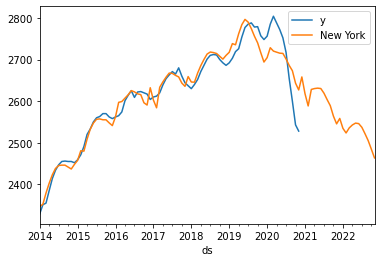

In [114]:
new_york.plot()

In [115]:
ny = new_york.reset_index()
ny

,ds,y,New York
0,2014-01-01,2329.0,2346.872561
1,2014-02-01,2351.0,2352.189681
2,2014-03-01,2355.0,2379.199108
3,2014-04-01,2385.0,2402.705534
4,2014-05-01,2414.0,2423.037678
5,2014-06-01,2434.0,2438.249753
6,2014-07-01,2447.0,2445.272499
7,2014-08-01,2455.0,2446.214660
8,2014-09-01,2456.0,2446.169492
9,2014-10-01,2455.0,2441.566444


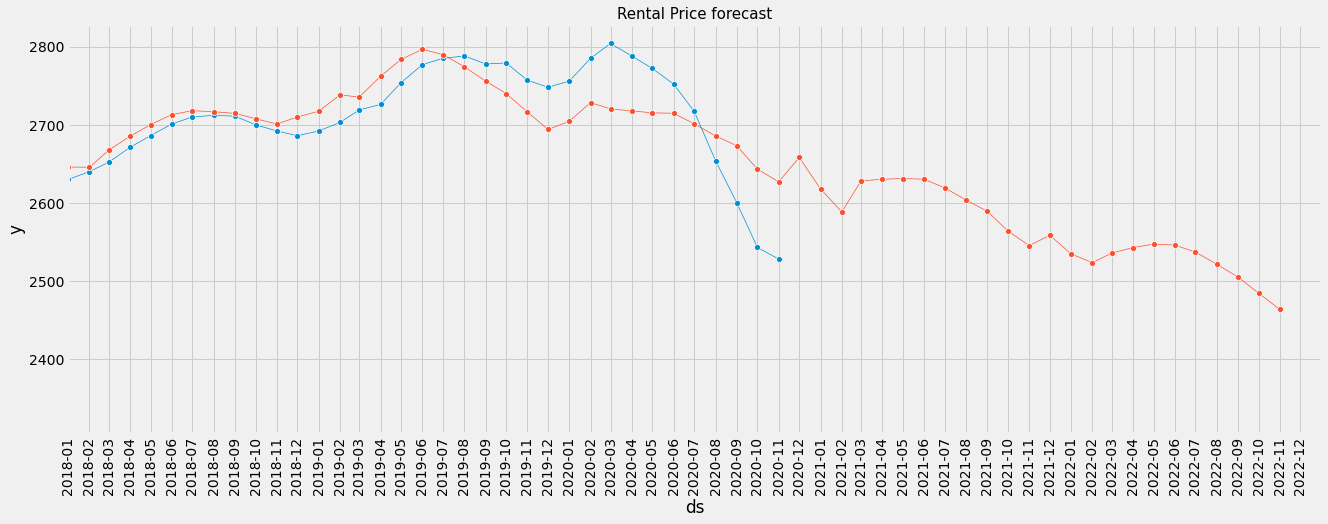

In [116]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m')

plt.style.use('fivethirtyeight')
fig, a = plt.subplots(figsize=(20,7))
# fig.autofmt_xdate()


date = ny['ds']
a = sns.lineplot(x=date, y='y', data=ny,  marker='o', linewidth=0.7)
a = sns.lineplot(x=date, y='New York', data=ny, marker='o', linewidth=0.7)
a.set_title("Rental Price forecast",fontsize=15)

a.set_xlim([datetime.date(2018, 1, 1), datetime.date(2022, 12, 31)])
a.xaxis.set_major_locator(months)
a.xaxis.set_major_formatter(years_fmt)
a.xaxis.set_minor_locator(months)

plt.xticks(rotation = 'vertical')
plt.show()

In [117]:
la = pd.concat([df_final.set_index('ds').query("city=='Los Angeles'")['y'], target['Los Angeles']], axis=1)
la = la.reset_index()

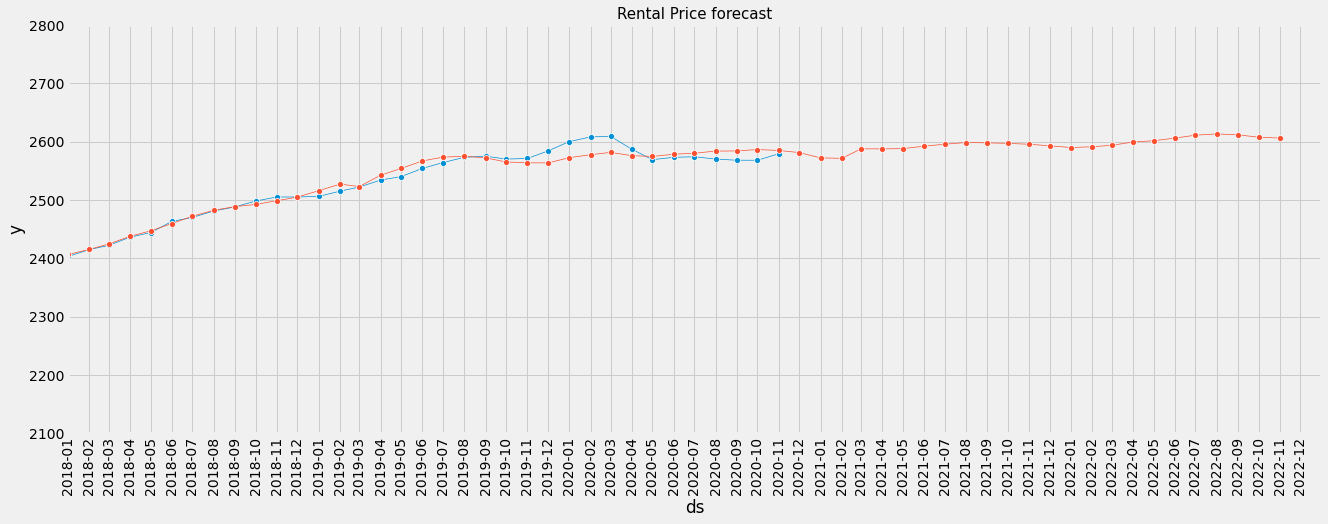

In [118]:
fig, ax = plt.subplots(figsize=(20,7))

date = la['ds']
ax = sns.lineplot(x=date, y='y', data=la,  marker='o', linewidth=0.7)
ax = sns.lineplot(x=date, y='Los Angeles', data=la, marker='o', linewidth=0.7)
ax.set_title("Rental Price forecast",fontsize=15)

ax.set_xlim([datetime.date(2018, 1, 1), datetime.date(2022, 12, 31)])
ax.set_ylim([2100, 2800])
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.xticks(rotation = 'vertical')
plt.show()

In [119]:
ch = pd.concat([df_final.set_index('ds').query("city=='Chicago'")['y'], target['Chicago']], axis=1)
ch = ch.reset_index()

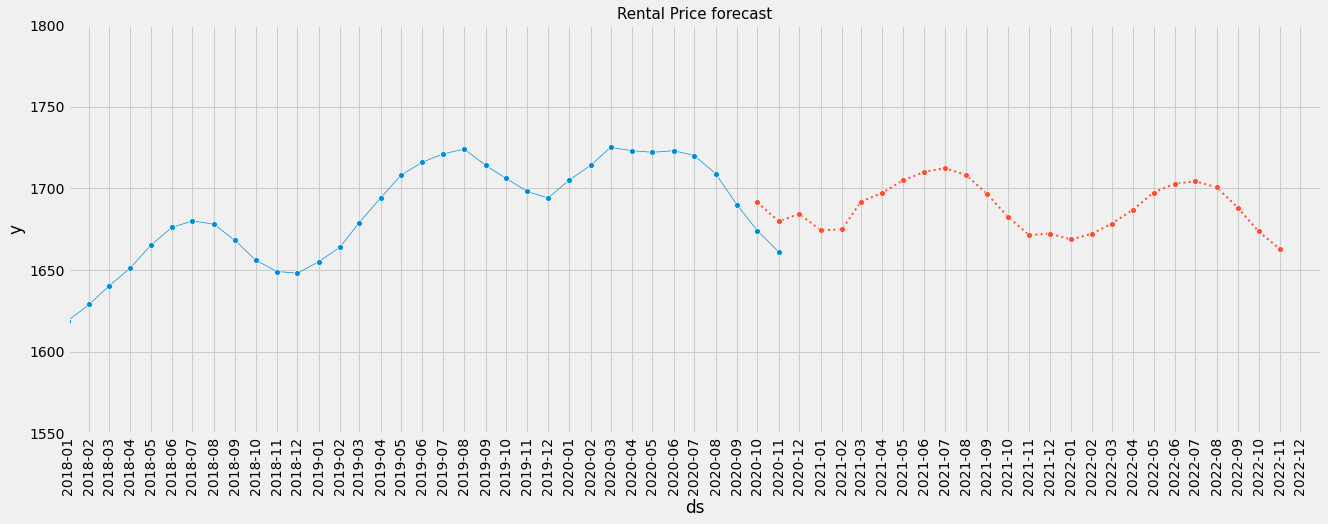

In [120]:
fig, axs = plt.subplots(figsize=(20,7))

c = ch[ch['ds'] >= '2020-10-01']
date = ch['ds']
axs = sns.lineplot(x=date, y='y', data=ch,  marker='o', linewidth=0.7)
axs = sns.lineplot(x=date, y='Chicago', data=c, linewidth=2, linestyle=':', marker='o')
axs.set_title("Rental Price forecast",fontsize=15)

axs.set_xlim([datetime.date(2018, 1, 1), datetime.date(2022, 12, 31)])
axs.set_ylim([1550, 1800])
axs.xaxis.set_major_locator(months)
axs.xaxis.set_major_formatter(years_fmt)
axs.xaxis.set_minor_locator(months)

plt.xticks(rotation = 'vertical')
plt.show()

In [121]:
mae = mean_absolute_error(df_final.set_index('ds').query("city=='New York'")['y'],target['New York'][:83])
msre = np.sqrt(mean_squared_error(df_final.set_index('ds').query("city=='New York'")['y'],target['New York'][:83]))
r2 = r2_score(df_final.set_index('ds').query("city=='New York'")['y'],target['New York'][:83])
print("MAE",mae)
print("MSRE",msre)
print("R2",r2)

MAE 20.396299279169416
MSRE 29.46270033967926
R2 0.9346073422183212


In [122]:
mae = mean_absolute_error(df_final.set_index('ds').query("city=='Los Angeles'")['y'],target['Los Angeles'][:83])
msre = np.sqrt(mean_squared_error(df_final.set_index('ds').query("city=='Los Angeles'")['y'],target['Los Angeles'][:83]))
r2 = r2_score(df_final.set_index('ds').query("city=='Los Angeles'")['y'],target['Los Angeles'][:83])
print("MAE", mae)
print("MSRE", msre)
print("R2", r2)

MAE 6.69108974811715
MSRE 9.069296433745224
R2 0.998282195118578


In [123]:
mae = mean_absolute_error(df_final.set_index('ds').query("city=='Chicago'")['y'],target['Chicago'][:83])
msre = np.sqrt(mean_squared_error(df_final.set_index('ds').query("city=='Chicago'")['y'],target['Chicago'][:83]))
r2 = r2_score(df_final.set_index('ds').query("city=='Chicago'")['y'],target['Chicago'][:83])
print("MAE", mae)
print("MSRE", msre)
print("R2", r2)

MAE 5.4455644338521925
MSRE 7.1903241216100025
R2 0.9909492997208109


In [124]:
transposed = target.T
transposed = transposed.rename_axis('city').reset_index()

In [125]:
print(transposed.shape)
transposed.head()

(115, 108)


ds,city,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-10-01 00:00:00,2015-11-01 00:00:00,2015-12-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00
0,Akron,746.913791,752.904330,755.149073,760.249661,762.666727,768.270564,767.637942,768.989986,767.266734,768.930703,772.361949,773.968678,775.341392,778.518501,780.631805,786.300790,787.487519,795.777990,790.994070,792.614247,789.607766,790.673544,795.180952,796.901435,798.180442,798.510852,804.777909,807.140314,810.506081,808.992318,814.979209,814.262464,813.524234,814.948382,814.639125,815.083721,815.643824,823.657537,825.125951,828.586496,830.392824,831.346199,832.968026,832.158456,829.808808,830.254662,830.697611,830.783816,830.785645,835.393441,836.389255,840.107100,841.186027,845.407121,843.436361,843.405661,840.299666,840.626144,842.675369,843.187281,843.428684,847.642094,850.949772,857.951184,860.427359,870.050283,866.566360,869.529868,867.866717,870.232494,876.083232,879.103712,881.726050,883.399790,890.923512,894.629248,899.295012,899.124580,906.411468,907.038054,907.643155,910.367300,911.401374,913.145968,915.049402,924.406445,927.088190,931.892065,935.815207,938.955956,942.694597,944.073656,943.912638,946.476521,949.108099,951.312333,953.502792,960.299217,963.271859,969.178333,972.375289,978.785013,978.932281,981.090212,980.172847,982.617353,986.855155
1,Albany,1111.163468,1114.102213,1123.908458,1141.669837,1144.389460,1152.827421,1158.527128,1153.021025,1153.902492,1147.329811,1139.000065,1137.901471,1148.966239,1152.647522,1153.002023,1173.457924,1169.631517,1183.816535,1192.993851,1182.812643,1180.204996,1172.117329,1162.246546,1166.517500,1180.440016,1186.121461,1193.183489,1203.195692,1216.912469,1211.690078,1207.552565,1208.508999,1213.864641,1210.899659,1207.282147,1196.937855,1203.373912,1203.884314,1221.737068,1235.321554,1243.217219,1244.488103,1245.077621,1242.594810,1245.441738,1240.852516,1235.031116,1229.471132,1238.468041,1240.855448,1250.163711,1267.373753,1269.559823,1277.446447,1282.61587

In [126]:
melt2 = transposed.melt(id_vars='city', var_name='date', value_name='price')

In [127]:
melt2

,city,date,price
0,Akron,2014-01-01,746.913791
1,Albany,2014-01-01,1111.163468
2,Albuquerque,2014-01-01,970.463881
3,Allentown,2014-01-01,1084.932048
4,Anaheim,2014-01-01,1869.304597
...,...,...,...
12300,Washington,2022-11-01,2024.589580
12301,Wichita,2022-11-01,875.554089
12302,Winston,2022-11-01,1365.675469
12303,Worcester,2022-11-01,1598.170594


In [128]:
melt2.shape

(12305, 3)

In [129]:
melt2.tail()

,city,date,price
12300,Washington,2022-11-01,2024.589580
12301,Wichita,2022-11-01,875.554089
12302,Winston,2022-11-01,1365.675469
12303,Worcester,2022-11-01,1598.170594
12304,Youngstown,2022-11-01,774.949805


In [130]:
melt2.to_csv("data/predicted_rentals_cities.csv")

In [225]:
# resample df to get monthly mean price per state 
us_states = df_final.set_index('ds').groupby('state').resample('M').mean()

In [229]:
us_states = us_states.reset_index()

In [274]:
us_states.shape

(3403, 3)

<AxesSubplot:xlabel='ds'>

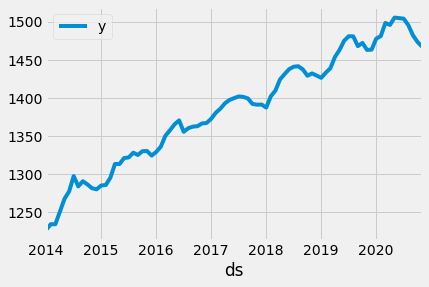

In [234]:
us_states[us_states['state'] == "New York"].set_index('ds').plot()

<AxesSubplot:xlabel='ds'>

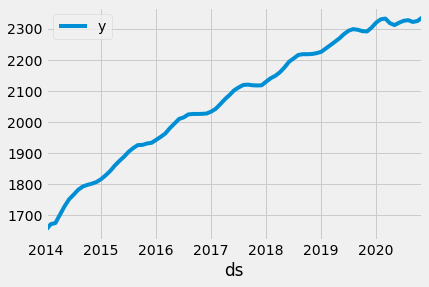

In [235]:
us_states[us_states['state'] == "California"].set_index('ds').plot()

<AxesSubplot:xlabel='ds'>

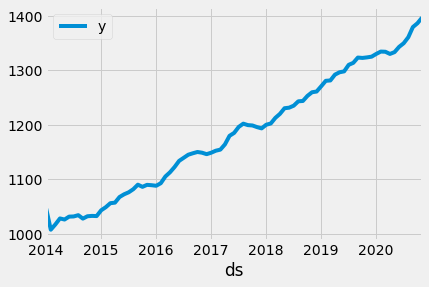

In [236]:
us_states[us_states['state'] == "Georgia"].set_index('ds').plot()

In [237]:
len(us_states['state'].unique())

41

In [266]:
us_states['state'].value_counts()

District of Columbia    83
Indiana                 83
Alabama                 83
Mississippi             83
Idaho                   83
Minnesota               83
Rhode Island            83
Nebraska                83
Oklahoma                83
Missouri                83
Washington              83
Massachusetts           83
Hawaii                  83
New Mexico              83
Virginia                83
California              83
Texas                   83
Kansas                  83
Colorado                83
Pennsylvania            83
North Carolina          83
Maryland                83
Ohio                    83
Nevada                  83
Louisiana               83
Arizona                 83
Wisconsin               83
United States           83
Michigan                83
Oregon                  83
Florida                 83
New York                83
Georgia                 83
South Carolina          83
Tennessee               83
Illinois                83
Iowa                    83
A

In [238]:
us_st = us_states.groupby('state')

In [239]:
us_st.head()

,state,ds,y
0,Alabama,2014-01-31,909.0
1,Alabama,2014-02-28,919.0
2,Alabama,2014-03-31,917.0
3,Alabama,2014-04-30,919.0
4,Alabama,2014-05-31,918.0
...,...,...,...
3320,Wisconsin,2014-01-31,1095.0
3321,Wisconsin,2014-02-28,1089.0
3322,Wisconsin,2014-03-31,1090.0
3323,Wisconsin,2014-04-30,1086.0


In [240]:
target_states = pd.DataFrame()

In [241]:
for state in us_st.groups:
    gr = us_st.get_group(state)
    
    # define model with confidence interval of 95%
    m2 = Prophet(interval_width=0.95)
    # fit the data
    m2.fit(gr)
    # make forecast for next two years
    fut = m2.make_future_dataframe(periods=12*2, freq='MS')
    f_cast = m2.predict(fut)
#     m.plot(forecast)
    # rename column , so it won't be ovewriten by next city
    f_cast = f_cast.rename(columns={'yhat': state})
    target_states = pd.merge(target_states, f_cast.set_index('ds'), how='outer', left_index=True, right_index=True)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [242]:
target_states = target_states[[state for state in us_st.groups.keys()]]

In [243]:
target_states.tail()

,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Nebraska,Nevada,New Mexico,New York,North Carolina,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,Tennessee,Texas,United States,Utah,Virginia,Washington,Wisconsin
ds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-01,1149.427181,1509.698129,976.698647,2400.566866,1767.423944,1784.013345,2063.558029,1850.807536,1467.761926,2123.028756,1486.366311,1699.702125,1375.969919,1203.647791,880.184273,1062.682582,1341.931521,1681.944032,1764.788139,1369.323421,1601.982893,1311.181121,1252.034460,1341.629993,1538.042546,1311.852543,1544.847276,1434.983409,1118.056021,1198.229925,1730.721398,1308.491985,1710.103046,1413.899105,1492.737537,1485.621013,1790.922399,1449.092198,1424.570104,1741.332113,1334.411816
2022-08-01,1153.276776,1516.752625,983.148705,2404.736634,1772.841433,1792.815927,2052.886928,1857.863150,1470.550011,2129.532229,1493.948972,1706.504451,1379.757176,1205.437070,888.626721,1060.528389,1336.570494,1681.507733,1776.404171,1376.432099,1601.902196,1309.331264,1258.752076,1342.107409,1543.762527,1326.556685,1538.933079,1442.232155,1124.535690,1202.714445,1737.826119,1330.510313,1721.435906,1424.437579,1501.920040,1489.891979,1794.088758,1448.594673,1434.915030,1748.369159,1336.170499
2022-09-01,1149.272315,1524.200434,983.939168,2412.030914,1771.900896,1789.383881,2060.079345,1857.899229,1476.850112,2121.369989,1511.165503,1701.939184,1386.060485,1210.654866,886.337307,1066.898607,1327.593475,1681.651308,1762.005428,1376.259656,1608.483740,1318.861647,1259.753862,1347.448384,1553.160965,1325.534151,1540.865981,1445.334705,1127.947431,1204.965464,1736.933566,1315.839011,1709.274922,1428.922894,1497.435003,1490.211115,1791.724369,1454.717522,1434.839919,1755.946483,1341.892477
2022-10-01,1171.461503,1532.140327,988.616419,2408.373595,1774.112584,1800.406664,2055.519197,1860.354644,1481.354248,2128.228283,1509.564453,1691.543038,1379.800470,1211.170998,879.768132,1057.884477,1336.276628,1676.053080,1755.078556,1371.768884,1604.523045,1337.316805,1265.121021,1346.138418,1562.258625,1328.494961,1542.630037,1447.805717,1127.133617,1203.132711,1746.334260,1330.932000,1699.206010,1431.857839,1509.866820,1488.766701,1789.840516,1451.766484,1436.073688,1756.694400,1332.153177
2022-11-01,1160.244803,1549.803498,986.660100,2411.126926,1766.457927,1800.559330,2036.353496,1874.234532,1487.904552,2120.887417,1513.393347,1678.461371,1386.421824,1212.103092,876.260149,1055.825831,1340.906950,1682.287700,1752.594423,1373.912784,1599.719240,1337.959680,1266.160657,1337.986928,1568.824118,1335.417591,1531.339277,1449.400718,1119.889401,1206.332982,1737.187458,1337.039279,1712.451915,1426.976347,1514.954666,1487.035939,1787.267542,1463.767997,1430.452222,1750.938723,1334.844405


In [267]:
target_states.shape

(107, 41)

In [244]:
transposed2 = target_states.T
transposed2 = transposed2.rename_axis('state').reset_index()

In [245]:
print(transposed2.shape)
transposed2.head()

(41, 108)


ds,state,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-09-30 00:00:00,2014-10-31 00:00:00,2014-11-30 00:00:00,2014-12-31 00:00:00,2015-01-31 00:00:00,2015-02-28 00:00:00,2015-03-31 00:00:00,2015-04-30 00:00:00,2015-05-31 00:00:00,2015-06-30 00:00:00,2015-07-31 00:00:00,2015-08-31 00:00:00,2015-09-30 00:00:00,2015-10-31 00:00:00,2015-11-30 00:00:00,2015-12-31 00:00:00,2016-01-31 00:00:00,2016-02-29 00:00:00,2016-03-31 00:00:00,2016-04-30 00:00:00,2016-05-31 00:00:00,2016-06-30 00:00:00,2016-07-31 00:00:00,2016-08-31 00:00:00,2016-09-30 00:00:00,2016-10-31 00:00:00,2016-11-30 00:00:00,2016-12-31 00:00:00,2017-01-31 00:00:00,2017-02-28 00:00:00,2017-03-31 00:00:00,2017-04-30 00:00:00,2017-05-31 00:00:00,2017-06-30 00:00:00,2017-07-31 00:00:00,2017-08-31 00:00:00,2017-09-30 00:00:00,2017-10-31 00:00:00,2017-11-30 00:00:00,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-30 00:00:00,2018-10-31 00:00:00,2018-11-30 00:00:00,2018-12-31 00:00:00,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,2019-04-30 00:00:00,2019-05-31 00:00:00,2019-06-30 00:00:00,2019-07-31 00:00:00,2019-08-31 00:00:00,2019-09-30 00:00:00,2019-10-31 00:00:00,2019-11-30 00:00:00,2019-12-31 00:00:00,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00
0,Alabama,912.184765,917.380442,917.667140,920.230388,923.845839,927.833751,928.163017,932.634720,941.490256,935.748894,935.385724,937.214796,938.878682,943.462950,943.999416,943.119307,947.746945,951.840070,950.751685,956.712208,961.662336,957.598702,956.028574,959.388053,960.161104,963.632504,960.927175,968.035533,967.293872,968.635095,969.348057,968.275983,982.513510,972.915579,974.420970,972.616797,974.352588,978.495383,976.666639,980.911611,982.697007,985.728649,986.618676,988.705949,1000.619852,993.613762,994.836198,995.522721,997.910588,1002.888172,1002.933629,1005.263418,1008.637628,1012.392084,1012.480195,1016.710745,1027.258171,1023.889291,1025.822071,1030.023851,1034.060444,1040.781431,1043.683551,1043.699607,1049.253283,1054.242573,1054.080226,1060.966787,1066.813080,1063.675483,1063.005422,1067.294969,1069.526251,1074.361802,1073.114702,1081.692332,1082.468920,1085.279415,1087.510755,1087.957059,1103.663983,1095.584431,1098.559220,1102.720983,1096.504991,1100.878527,1106.504643,1102.292152,1119.523320,1115.939975,1116.439485,1121.104567,1114.832394,1140.226272,1127.490009,1134.209840,1129.453969,1133.573435,1139.178036,1135.981842,1150.322961,1148.144682,1149.427181,1153.276776,1149.272315,1171.461503,1160.244803
1,Arizona,954.535266,961.379095,966.474984,972.471310,977.484948,980.721122,983.511115,984.813560,986.128675,986.861459,990.158966,989.393487,992.514251,993.976560,999.675635,1007.616266,1014.375295,1020.091108,1023.618431,1025.223299,1026.655105,1025.143433,1028.591024,1035.260236,1039.566038,1043.442821,1051.022236,1056.625987,1061.631344,1063.152778,1067.756364,1071.786885,1076.088950,1084.815175,1091.596476,1076.907415,1079.852870,1094.075177,1100.929537,1107.241135,1112.789140,1115.709755,1119.977960,1123.208794,1126.564838,1131.821783,1137.306632,1129.698992,1135.848584,1146.598067,1156.02205

In [246]:
melt3 = transposed2.melt(id_vars='state', var_name='date', value_name='price')

In [293]:
print(melt3.shape)
melt3[:]

(4387, 3)


,state,date,price
4382,United States,2022-11-01,1787.267542
4383,Utah,2022-11-01,1463.767997
4384,Virginia,2022-11-01,1430.452222
4385,Washington,2022-11-01,1750.938723
4386,Wisconsin,2022-11-01,1334.844405


In [304]:
forecasted = melt3[melt3['date'] >= '2020-12']

In [313]:
forecasted = forecasted.reset_index()
forecasted = forecasted.drop(columns=['index'])

In [314]:
forecasted

,state,date,price
0,Alabama,2020-12-01,1102.720983
1,Arizona,2020-12-01,1403.961153
2,Arkansas,2020-12-01,920.633611
3,California,2020-12-01,2345.948434
4,Colorado,2020-12-01,1709.051302
...,...,...,...
979,United States,2022-11-01,1787.267542
980,Utah,2022-11-01,1463.767997
981,Virginia,2022-11-01,1430.452222
982,Washington,2022-11-01,1750.938723


In [315]:
forecasted.to_csv("data/forecasted_rentals_states.csv")

In [250]:
ny = pd.concat([us_states.set_index('ds').query("state=='New York'")['y'], target_states['New York']], axis=1)
ny = ny.reset_index()

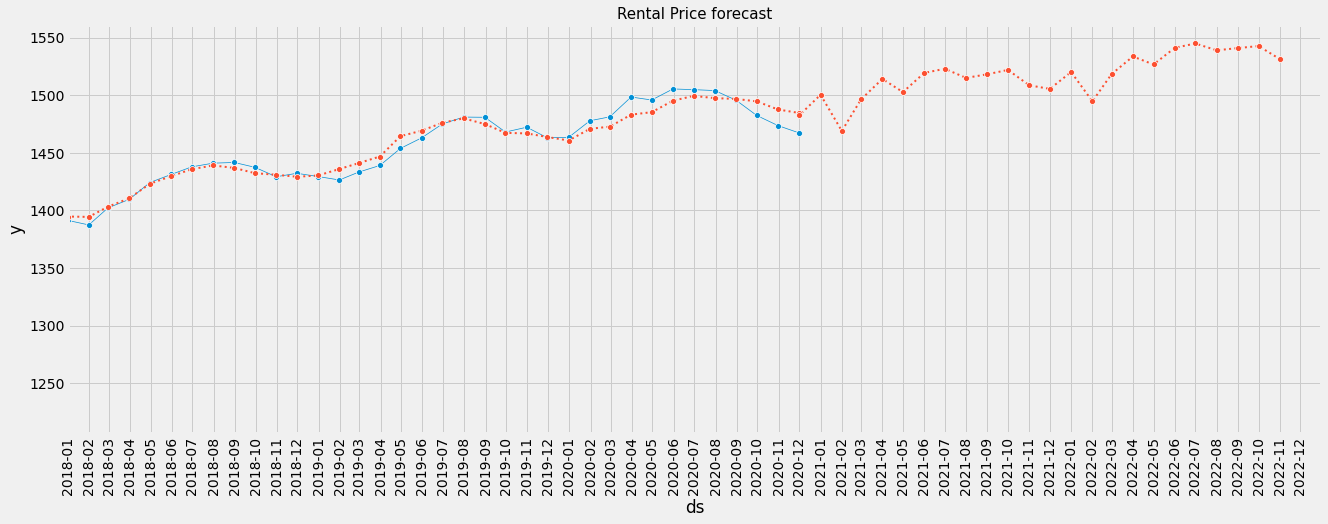

In [273]:
fig, axs = plt.subplots(figsize=(20,7))

axs = sns.lineplot(x='ds', y='y', data=ny,  marker='o', linewidth=0.7)
axs = sns.lineplot(x='ds', y='New York', data=ny, linewidth=2, linestyle=':', marker='o')

axs.set_title("Rental Price forecast",fontsize=15)

axs.set_xlim([datetime.date(2018, 1, 1), datetime.date(2022, 12, 31)])
# axs.set_ylim([1550, 1800])
axs.xaxis.set_major_locator(months)
axs.xaxis.set_major_formatter(years_fmt)
axs.xaxis.set_minor_locator(months)

plt.xticks(rotation = 'vertical')
plt.show()

In [259]:
ca = pd.concat([us_states.set_index('ds').query("state=='California'")['y'], target_states['California']], axis=1)
ca = ca.reset_index()

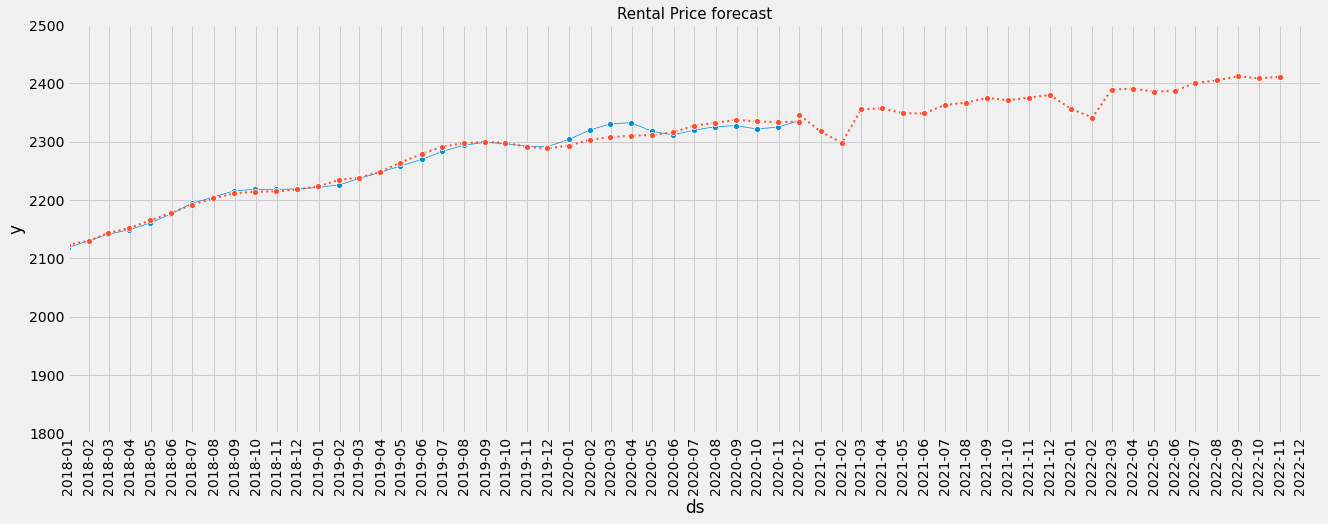

In [272]:
fig, axs = plt.subplots(figsize=(20,7))

axs = sns.lineplot(x='ds', y='y', data=ca,  marker='o', linewidth=0.7)
axs = sns.lineplot(x='ds', y='California', data=ca, linewidth=2, linestyle=':', marker='o')

axs.set_title("Rental Price forecast",fontsize=15)

axs.set_xlim([datetime.date(2018, 1, 1), datetime.date(2022, 12, 31)])
axs.set_ylim([1800, 2500])
axs.xaxis.set_major_locator(months)
axs.xaxis.set_major_formatter(years_fmt)
axs.xaxis.set_minor_locator(months)

plt.xticks(rotation = 'vertical')
plt.show()

In [263]:
ga = pd.concat([us_states.set_index('ds').query("state=='Georgia'")['y'], target_states['Georgia']], axis=1)
ga = ga.reset_index()

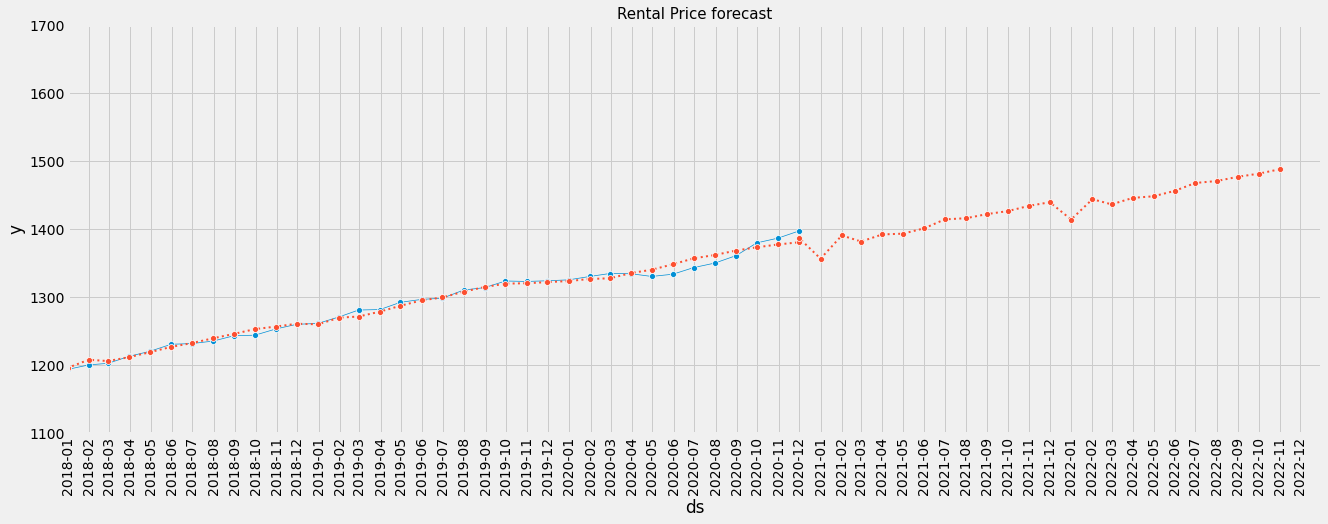

In [271]:
fig, axs = plt.subplots(figsize=(20,7))

axs = sns.lineplot(x='ds', y='y', data=ga,  marker='o', linewidth=0.7)
axs = sns.lineplot(x='ds', y='Georgia', data=ga, linewidth=2, linestyle=':', marker='o')

axs.set_title("Rental Price forecast",fontsize=15)

axs.set_xlim([datetime.date(2018, 1, 1), datetime.date(2022, 12, 31)])
axs.set_ylim([1100, 1700])
axs.xaxis.set_major_locator(months)
axs.xaxis.set_major_formatter(years_fmt)
axs.xaxis.set_minor_locator(months)

plt.xticks(rotation = 'vertical')
plt.show()

In [268]:
mae = mean_absolute_error(us_states.set_index('ds').query("state=='New York'")['y'],target_states['New York'][:83])
msre = np.sqrt(mean_squared_error(us_states.set_index('ds').query("state=='New York'")['y'],target_states['New York'][:83]))
r2 = r2_score(us_states.set_index('ds').query("state=='New York'")['y'],target_states['New York'][:83])
print("MAE", mae)
print("MSRE", msre)
print("R2", r2)

MAE 4.75731969013686
MSRE 6.240510653738238
R2 0.9930157770380413


In [269]:
mae = mean_absolute_error(us_states.set_index('ds').query("state=='California'")['y'],target_states['California'][:83])
msre = np.sqrt(mean_squared_error(us_states.set_index('ds').query("state=='California'")['y'],target_states['California'][:83]))
r2 = r2_score(us_states.set_index('ds').query("state=='California'")['y'],target_states['California'][:83])
print("MAE", mae)
print("MSRE", msre)
print("R2", r2)

MAE 4.646397831297318
MSRE 6.34275376358768
R2 0.9989595192595866


In [270]:
mae = mean_absolute_error(us_states.set_index('ds').query("state=='Georgia'")['y'],target_states['Georgia'][:83])
msre = np.sqrt(mean_squared_error(us_states.set_index('ds').query("state=='Georgia'")['y'],target_states['Georgia'][:83]))
r2 = r2_score(us_states.set_index('ds').query("state=='Georgia'")['y'],target_states['Georgia'][:83])
print("MAE", mae)
print("MSRE", msre)
print("R2", r2)

MAE 4.561807357510573
MSRE 6.001990032200515
R2 0.9970672691229395


In [316]:
d_states = pd.read_csv('data/forecasted_rentals_states.csv')
d_states.head()

,Unnamed: 0,state,date,price
0,0,Alabama,2020-12-01,1102.720983
1,1,Arizona,2020-12-01,1403.961153
2,2,Arkansas,2020-12-01,920.633611
3,3,California,2020-12-01,2345.948434
4,4,Colorado,2020-12-01,1709.051302


In [324]:
forecasted_cities = pd.read_csv('data/predicted_rentals_cities.csv')
forecasted_cities = forecasted_cities.drop(columns=['Unnamed: 0'])
forecasted2 = forecasted_cities[forecasted_cities['date'] >= '2020-12-01']
forecasted2

,city,date,price,state
9545,Akron,2020-12-01,913.145968,Ohio
9546,Albany,2020-12-01,1325.452948,New York
9547,Albuquerque,2020-12-01,1208.463059,New Mexico
9548,Allentown,2020-12-01,1330.582095,Pennsylvania
9549,Anaheim,2020-12-01,2581.114949,California
...,...,...,...,...
12300,Washington,2022-11-01,2024.589580,District of Columbia
12301,Wichita,2022-11-01,875.554089,Kansas
12302,Winston,2022-11-01,1365.675469,North Carolina
12303,Worcester,2022-11-01,1598.170594,Massachusetts


In [326]:
forecasted2 = forecasted2.reset_index()
forecasted2 = forecasted2.drop(columns=['index'])
forecasted2.head()

,city,date,price,state
0,Akron,2020-12-01,913.145968,Ohio
1,Albany,2020-12-01,1325.452948,New York
2,Albuquerque,2020-12-01,1208.463059,New Mexico
3,Allentown,2020-12-01,1330.582095,Pennsylvania
4,Anaheim,2020-12-01,2581.114949,California


In [327]:
forecasted2.to_csv('data/forecasted_rentals_cities.csv')